In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import math
import matplotlib.pyplot as plt

In [30]:
def f(x):
    return 10*x**2-2*x+2

In [31]:
f(5.0)

242.0

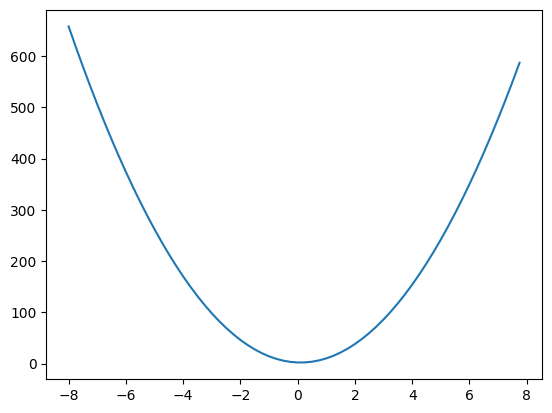

In [41]:
xs = np.arange(-8, 8, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [48]:
h=0.0000001
x=0.1
(f(x+h)-f(x))/h

1.0014211682118912e-06

In [53]:
a = 4.0
b = -2.0
c = 15.0
d = a*b+c
print(d)

7.0


In [54]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
a += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 6.997999999999999
slope -2.000000000000668


In [55]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
b += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 7.004
slope 3.9999999999995595


In [56]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
c += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 7.0009999999999994
slope 0.9999999999994458
